In [1]:
# Combine and filter raw results files

import jsonlines

RESULTS_DIR = '../results'


batches = [
#     {
#         'count': 33,
#         'unbiased_file': 'annotated_instances_confound_pilot_1_unbiased',
#         'error_file': 'annotated_instances_confound_pilot_1_errors',
#         'grouping_file': 'annotated_instances_confound_pilot_1_grouping'
#     },
    {
        'count': 1125,
        'unbiased_file': 'annotated_instances_confound_main_1_unbiased',
        'error_file': 'annotated_instances_confound_main_1_errors',
        'grouping_file': 'annotated_instances_confound_main_1_groups'
    },
    {
        'count': 825,
        'unbiased_file': 'annotated_instances_confound_main_2_unbiased',
        'error_file': 'annotated_instances_confound_main_2_errors',
        'grouping_file': 'annotated_instances_confound_main_2_grouping'
    },
    {
        'count': 825,
        'unbiased_file': 'annotated_instances_confound_main_3_unbiased',
        'error_file': 'annotated_instances_confound_main_3_errors',
        'grouping_file': 'annotated_instances_confound_main_3_groups'
    },
    {
        'count': 825,
        'unbiased_file': 'annotated_instances_confound_main_4_unbiased',
        'error_file': 'annotated_instances_confound_main_4_errors',
        'grouping_file': 'annotated_instances_confound_main_4_groups'
    },
]


import jsonlines

unbiased_results = []
error_results = []
grouping_results = []

dodgy_unbiased_pids = [
    '63e51e063af1cc5baf0c72ca', # short submission times - should all have been filtered already
    '63d153292ab8a7e4066fb52a_64e36f90f40b8f3dcf39fb07',
    '5b59a51fca6d01000157a8c3_64e36f9a8122d5157b572dda',
    '61082528f9b96a241acc05fb_64e36f9cc16284d471513be4',
    '5ee64d0bf796cb3b252a8c99_64e36fc3f6b3f1a7b75a137a',
    '63174af7d57182f9bf90c094_64e36f878259229076bd81ef',
    '59f77d39b47dfc0001b660ea_64e36f8fcc311094aef56935',
    '63b80a8b220f924d975670bc_64e36f8642f86b7f0a571e95',
    '5f3c35f98baa00a729e2efe7_64e36f92a65c0706b33e4ca7',
    '63d7cd776c3b50b48eabd288_64e36f9532fc083bab28d384',
    '5ee4a14b578f8a000b384376_64e36f9868c55c03713798c6',

]
dodgy_error_pids = [
    '5cc052c9a1e263001715594d_64e48c55a73b60fefa571e73', # failed attn check
    '648174282bcdf5119b9105ca_64e499086db5686deba3d3ec', # failed attn check
    '63468b5809bf04222262bfed_64e49cd6feda20532cf5323f', # failed attn check
    '5ded5559033565416fe02a77_64e4a9e440577eb35115f3af', # dupe
    '63d3fb730f03adf8b4a28a37_64e4a6e67aed15f8107093ba', # dupe
    '5d66f49c531d6e0001e99e8a_64e49fb7fe259d3ddb6b1e90', # dupe
    '5ea026ebbc5a78011ea73ffb_64e605bf9df672178c96ea95', # failed attn check
    '5c871ab7de75d4001602869d_64e6091ab9c4cc4c3a0cdb0f', # dupe
    '60c382725a7a55abef2e8e99_64e60a4d665f13b5537aef20',
    '57c957626736cf0001b31f39_64e889289cc69611603e1d90', # failed attn
    '60c48535b67b2b74eef760d0_64e8a2656e057c3d5eafe8da', # dupe
    '647f87dfe5161fce9adc1b97_64e8a4520f9f90c3bb97fcc7', # dupe
    '60be1e056f39c387c4f02308_64e8a262107372e29870fcf5', # dupe
    '632c673f8b99c86ac2fba537_64f9d303ed321625e6c45014', # dupe
    '5ffb432901d8311622530a52_64f9d31a99b5b5cd3b1f865c', # dupe
    '5fd7772607bd47085d6397ff_64f9d3550c67157f3f0873ef', # dupe
    '55ed87f0748092000baa9a0b_64f9d19096b5aea703e0da31', # failed check
    '614e4f5af7eba1c013541155_64f9bee477bc847433922f34', # failed check
]
dodgy_grouping_pids = [
    '6129ba3532102d5c539ff29b_64e4cc1d26e13bf72963dcb1', # dupe
    '5c4e7dcdd3a5e30001836f82_64e62949a137bdef98a5dda5', # dupe
    '5d863f244d401800016ece02_64f9e657db534a2b3c934e26', # dupe
    '588a59813e1f290001aa78c1_64faea6a8bcc8f851326d0a2', # weird time out, partial submission
]

for batch in batches:
    
    unbiased_file = batch['unbiased_file']
    error_file = batch['error_file']
    grouping_file = batch['grouping_file']

    with jsonlines.open(f'{RESULTS_DIR}/batch_controlled/prolific_results/{unbiased_file}.jsonl') as reader:
        unbiased_results_curr = list(reader)
    with jsonlines.open(f'{RESULTS_DIR}/batch_controlled/prolific_results/{error_file}.jsonl') as reader:
        error_results_curr = list(reader)
    with jsonlines.open(f'{RESULTS_DIR}/batch_controlled/prolific_results/{grouping_file}.jsonl') as reader:
        grouping_results_curr = list(reader)



    unbiased_results_curr = [row for row in unbiased_results_curr if row['label_annotations']['email'].split('_')[0] not in dodgy_unbiased_pids and row['label_annotations']['email'] not in dodgy_unbiased_pids]
    error_results_curr = [row for row in error_results_curr if row['label_annotations']['email'] not in dodgy_error_pids]
    grouping_results_curr = [row for row in grouping_results_curr if row['label_annotations']['email'] not in dodgy_grouping_pids]
    
    # Annotation count check
    from collections import Counter

    for label, results in [('Unbiased', unbiased_results_curr), ('Error', error_results_curr), ('Grouping', grouping_results_curr)]:

        id_count = Counter()
        for row in results:
            id_count[row['id']] += 1
            if id_count[row['id']] > 1:
                print('Dupe: ', row['label_annotations']['email'])

        if id_count.most_common(1)[0][1] > 1:
            print(f'{label}: Found multiple annotations for ids ({unbiased_file}):')
            print({ix: count for ix, count in id_count.items() if count > 1})
        missing_ids = [i for i in range(batch['count']) if str(i) not in id_count.keys()]
        if len(missing_ids) > 0:
            print(f'{label}: Missing annotations for IDs:')
            print(missing_ids)
            
    unbiased_results.extend(unbiased_results_curr)
    error_results.extend(error_results_curr)
    grouping_results.extend(grouping_results_curr)
    

In [2]:
# Check annotation counts
len(unbiased_results), len(error_results), len(grouping_results)

(3600, 3600, 3600)

In [3]:
# Attention check (granular)
for row in error_results:
    if 'positive_val' not in row['label_annotations'] or (row['label_annotations']['positive_val'] != '5' and row['label_annotations']['negative_val'] != '1'):
        print(row['id'])
        print(row['label_annotations']['positive_val'], row['label_annotations']['negative_val'], row['label_annotations']['email'], row['behavioral_data']['time_string']) # row['behavioral_data']['time_string'], row['label_annotations'].get('feedback',None)

In [4]:
# Distractor check
from collections import defaultdict
import numpy as np

scores = []
print('Unbiased:')
for row in unbiased_results:
    
    if row['input_meta']['model_a'] == 'distractor':
        scores.append(row['label_annotations']['score_a'] <= row['label_annotations']['score_b'])
    elif row['input_meta']['model_b'] == 'distractor':
        scores.append(row['label_annotations']['score_a'] >= row['label_annotations']['score_b'])
print(np.mean(scores))

scores = []
print('Error:')
for row in error_results:

    
    if row['input_meta']['model_a'] == 'distractor':
#         print(row['input_meta'])
        scores.append(row['label_annotations']['overall_a'] <= row['label_annotations']['overall_b'])
    elif row['input_meta']['model_b'] == 'distractor':
        scores.append(row['label_annotations']['overall_a'] >= row['label_annotations']['overall_b'])
        
print(np.mean(scores))

Unbiased:
0.9366666666666666
Error:
0.95


In [5]:
# Construct a DataFrame to use for the bulk of the analysis

import pandas as pd





error_factors = ['contradiction','inconsistent','factuality','relevance','formatting',  'refusal','repetition']
all_factors =  error_factors + ['overall']

group_factors = ['assertive','complexity']

all_datasets = ['wikihow','amazon','curation']
all_models = ['command_52B_v14.7_20230817','command_6B_v14.7_20230817','falcon40','mpt30instruct','llama13chat']

df_rows = []
for row in unbiased_results:
    for ab in ['a', 'b']:
        ba = 'b' if ab == 'a' else 'a'
        df_rows.append([
            row['input_meta']['dataset'],
            str(row['input_meta']['sample_ix']),
            row['input_meta'][f'model_{ab}'],
            row['input_meta'][f'preamble_type_{ab}'],
            row['input_meta'][f'model_{ba}'],
            row['input_meta'][f'preamble_type_{ba}'],
            row['input_text']['Prompt'],
            row['input_text'][f'Response {ab.upper()}'],
    #         row['label_annotations']['feedback'],
            row['behavioral_data']['time_string'],
            # Actual annotations below
            float(row['label_annotations'][f'score_{ab}']),
        ])

df_unbiased = pd.DataFrame(
    df_rows,
    columns=['dataset','sample_ix','model','preamble_type','other_model','other_preamble_type','prompt','response','time_str','score']
)


df_rows = []
for row in error_results:
    for ab in ['a', 'b']:
        ba = 'b' if ab == 'a' else 'a'
        df_row = [
            row['input_meta']['dataset'],
            str(row['input_meta']['sample_ix']),
            row['input_meta'][f'model_{ab}'],
            row['input_meta'][f'preamble_type_{ab}'],
            row['input_meta'][f'model_{ba}'],
            row['input_meta'][f'preamble_type_{ba}'],
            row['input_text']['Prompt'],
            row['input_text'][f'Response {ab.upper()}'],
    #         row['label_annotations']['feedback'],
            row['behavioral_data']['time_string'],
            # Actual annotations below
            float(row['label_annotations'][f'overall_{ab}']),
        ]
        
        for factor in error_factors:
            df_row.append(float(1.0 if row['label_annotations'][f'{factor}_{ab}'] == "Yes" else 0.0))
            
        df_rows.append(df_row)

df_errors = pd.DataFrame(
    df_rows,
    columns=['dataset','sample_ix','model','preamble_type','other_model','other_preamble_type','prompt','response','time_str','overall'] + error_factors,
    
)



df_rows = []
for row in grouping_results:
    for ab in ['a', 'b']:
        ba = 'b' if ab == 'a' else 'a'
        if f"complexity_{ab}" not in row['label_annotations']:
            print(row['label_annotations']['email'])
        df_row = [
            row['input_meta']['dataset'],
            str(row['input_meta']['sample_ix']),
            row['input_meta'][f'model_{ab}'],
            row['input_meta'][f'preamble_type_{ab}'],
            row['input_meta'][f'model_{ba}'],
            row['input_meta'][f'preamble_type_{ba}'],
            row['input_text']['Prompt'],
            row['input_text'][f'Response {ab.upper()}'],
    #         row['label_annotations']['feedback'],
            row['behavioral_data']['time_string'],
            # Actual annotations below
            float(row['label_annotations'][f'complexity_{ab}']),
            float(row['label_annotations'][f'assertive_{ab}']),
        ]
        
            
        df_rows.append(df_row)

df_groupings = pd.DataFrame(
    df_rows,
    columns=['dataset','sample_ix','model','preamble_type','other_model','other_preamble_type','prompt','response','time_str','complexity','assertive'],
    
)

df_groupings['length'] = df_groupings.response.str.split().agg(lambda x: len(x))

In [6]:
# Make a combined dataframe and write to disk

df_combined_filtered = df_errors[df_errors.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix']).agg(lambda x: np.mean(pd.Series.mode(x)))#.mean(numeric_only=True)

df_unbiased_filtered = df_unbiased[df_unbiased.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix']).mean(numeric_only=True)

df_groupings_filtered = df_groupings[df_groupings.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix']).mean(numeric_only=True)

df_combined_filtered['unbiased'] = df_unbiased_filtered.score

df_combined_filtered['complexity'] = df_groupings_filtered.complexity
df_combined_filtered['assertive'] = df_groupings_filtered.assertive
df_combined_filtered['length'] = df_groupings_filtered.length

df_unbiased.to_parquet('../results/batch_controlled/prolific_results/unbiased_full.parquet')

df_errors.to_parquet('../results/batch_controlled/prolific_results/errors_full.parquet')

df_groupings.to_parquet('../results/batch_controlled/prolific_results/groupings_full.parquet')

df_combined_filtered.to_parquet('../results/batch_controlled/prolific_results/combined_filtered.parquet')



/tmp/ipykernel_6638/1553010678.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  df_combined_filtered = df_errors[df_errors.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix']).agg(lambda x: np.mean(pd.Series.mode(x)))#.mean(numeric_only=True)
/tmp/ipykernel_6638/1553010678.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  df_combined_filtered = df_errors[df_errors.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix']).agg(lambda x: np.mean(pd.Series.mode(x)))#.mean(numeric_only=True)
/tmp/ipykernel_6638/1553010678.py:3: FutureWarning: Dropping invalid col

In [7]:
# Error rates by preamble type
df_combined_filtered.groupby('preamble_type').mean().round(3)

,overall,contradiction,inconsistent,factuality,relevance,formatting,refusal,repetition,unbiased,complexity,assertive,length
preamble_type,,,,,,,,,,,,
complexity_high,4.010,0.008,0.027,0.043,0.052,0.037,0.008,0.032,3.862,3.300,3.771,176.347
complexity_low,3.280,0.005,0.050,0.053,0.050,0.030,0.028,0.003,3.246,2.145,3.119,70.350
confidence_high,3.917,0.003,0.032,0.025,0.048,0.030,0.032,0.013,3.838,2.932,3.732,137.150
confidence_low,2.928,0.032,0.117,0.067,0.190,0.118,0.240,0.023,2.953,2.522,2.831,111.170
normal,3.846,0.005,0.052,0.045,0.075,0.032,0.035,0.032,3.755,2.810,3.576,134.167


In [8]:
# Helper function to convert field IDs to friendly names




field_ids_to_names = {
    'repetition': 'Repetition',
    'refusal': 'Refusal',
    'formatting': 'Formatting',
    'relevance': 'Relevance',
    'factuality': 'Factuality',
    'inconsistent': 'Inconsistency',
    'contradiction': 'Contradiction',
    'assertive': 'Assertiveness',
    'complexity': 'Complexity',
    'unbiased': 'Quality',
    'overall': 'Quality (biased)',
    
    'confidence_high': 'Assertiveness++',
    'confidence_low': 'Assertiveness--',
    'complexity_high': 'Complexity++',
    'complexity_low': 'Complexity--',
    'normal': 'Baseline',
    'command_52Bpref_v14.7_20230817': 'Command 52B',

     'command_6Bpref_v14.7_20230817': 'Command 6B',
     'falcon40': 'Falcon 40B Instruct',
     'mpt30instruct': 'MPT 30B Instruct',
     'llama13chat': 'Llama 2 13B'
}

def rename_fields(fields):
    return [field_ids_to_names[f] for f in fields]



In [9]:
# Use Cohere plot style

import coplot
import matplotlib.pyplot as plt
import matplotlib

plt.style.use(['cohere','sans'])



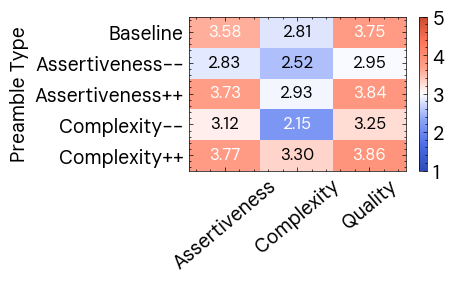

In [10]:
# Generate plot of confounder scores by preamble type

data = df_combined_filtered[group_factors+['unbiased']].groupby('preamble_type').mean()


plt.figure(figsize=(3.5,2))
plt.pcolor(data, cmap=coplot.COHERE_CMAP_POSNEG, vmin=1, vmax=5)
plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields(data.index))
plt.xticks(np.arange(0.5, len(data.columns), 1), rename_fields(data.columns), rotation=40)
plt.colorbar(ticks=[1,2,3,4,5])

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % data.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
#                  font='DM Sans',
                 fontsize=12,
                 color='white' if (data.iloc[y, x] > 3.5 or data.iloc[y, x] < 2.5) else 'black',
                 )
# plt.xlabel('Ratings')
plt.ylabel('Preamble Type')
plt.savefig('../plots/part2_grouping.pdf')
plt.show()

In [11]:
# How correlated are the two ratings?
df_groupings[['complexity','assertive']].corr()

,complexity,assertive
complexity,1.000000,0.345313
assertive,0.345313,1.000000


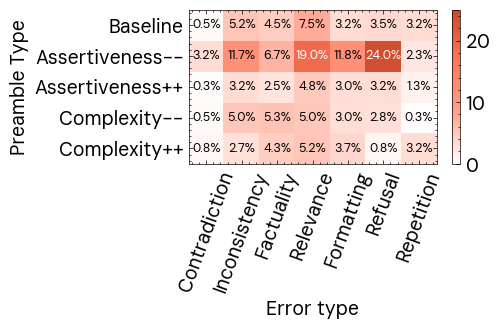

In [12]:
# Error rates by preamble type

data = df_errors[df_errors.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix'])[error_factors].agg(lambda x: np.mean(pd.Series.mode(x))).groupby('preamble_type').mean(numeric_only=True)
data *= 100

# data = data.iloc[::-1].T

plt.figure(figsize=(4,2))
plt.pcolor(data, cmap=coplot.COHERE_CMAP_POS, vmin=0, vmax=25)
plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields(data.index))
plt.xticks(np.arange(0.5, len(data.columns), 1), rename_fields(data.columns), rotation=70)
plt.colorbar()

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '{:0.1f}%'.format(data.iloc[y, x]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 font='DM Sans',
                 fontsize=9,
                 color='white' if data.iloc[y, x] > 15 else 'black',
                 )
plt.xlabel('Error type')
plt.ylabel('Preamble Type')
plt.savefig('../plots/part2_errors_by_preamble.pdf', bbox_inches='tight')
plt.show()




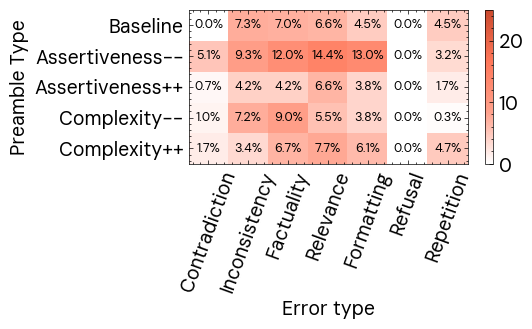

In [13]:
# Error rates by preamble type (excluding refusal examples)

data = df_errors[df_errors.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix'])[error_factors].agg(lambda x: np.max(pd.Series.mode(x)))
data = data[data.refusal != 1].groupby('preamble_type').mean(numeric_only=True) * 100




plt.figure(figsize=(4.5,2))
plt.pcolor(data, cmap=coplot.COHERE_CMAP_POS, vmin=0, vmax=25)
plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields(data.index))
plt.xticks(np.arange(0.5, len(data.columns), 1), rename_fields(data.columns), rotation=70)
plt.colorbar()

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '{:0.1f}%'.format(data.iloc[y, x]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 font='DM Sans',
                 fontsize=9,
                 color='white' if data.iloc[y, x] > 15 else 'black',
                 )
plt.xlabel('Error type')
plt.ylabel('Preamble Type')
plt.savefig('../plots/part2_errors_by_preamble_norefusals.pdf', bbox_inches='tight')
plt.show()




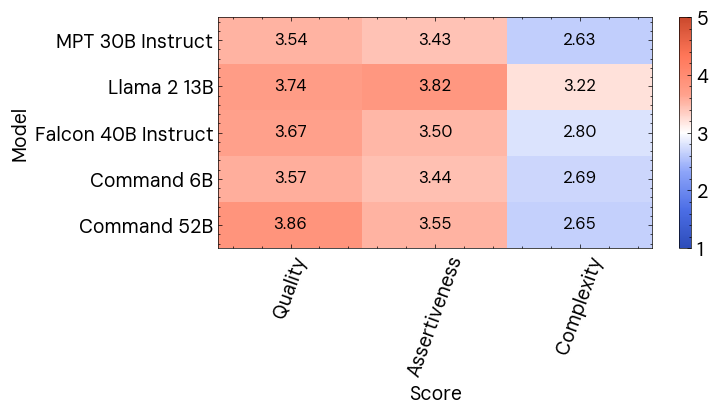

In [14]:
# Ratings by model

data = df_combined_filtered.reset_index()[df_combined_filtered.reset_index().preamble_type != 'confidence_low']
# data = df_combined_filtered
data = data.groupby(['dataset','model','preamble_type','sample_ix'])[['unbiased'] + group_factors].agg(lambda x: np.mean(pd.Series.mode(x))).groupby('model').mean(numeric_only=True)



plt.figure(figsize=(7,3))
plt.pcolor(data, cmap=coplot.COHERE_CMAP_POSNEG, vmin=1, vmax=5)
plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields(data.index))
plt.xticks(np.arange(0.5, len(data.columns), 1), rename_fields(data.columns), rotation=70)
plt.colorbar()

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % data.iloc[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=12
                 )
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

In [15]:
# Check annotator agreement for the samples with multiple annotations (standard devs)

scores_by_instance = defaultdict(list)


for row in error_results:
#     print(row)
    scores_by_instance[(row['input_meta']['dataset'],row['input_meta']['model_a'],row['input_meta']['model_b'],row['input_meta']['sample_ix'], row['input_meta']['preamble_type_a'], row['input_meta']['preamble_type_b'])].append({k: row['label_annotations'][k+'_a'] for k in all_factors}|{'prompt': row['input_text']['Prompt']}|{'response': row['input_text']['Response A']})
    scores_by_instance[(row['input_meta']['dataset'],row['input_meta']['model_b'],row['input_meta']['model_a'],row['input_meta']['sample_ix'], row['input_meta']['preamble_type_b'], row['input_meta']['preamble_type_a'])].append({k: row['label_annotations'][k+'_b'] for k in all_factors}|{'prompt': row['input_text']['Prompt']}|{'response': row['input_text']['Response B']})

    
agreement_instances = {k:v for k,v in scores_by_instance.items() if len(v) > 1}

scores_by_instance_unbiased = defaultdict(list)
for row in unbiased_results:
#     print(row)
    scores_by_instance_unbiased[(row['input_meta']['dataset'],row['input_meta']['model_a'],row['input_meta']['model_b'],row['input_meta']['sample_ix'], row['input_meta']['preamble_type_a'], row['input_meta']['preamble_type_b'])].append({k: row['label_annotations'][k+'_a'] for k in ['score']}|{'prompt': row['input_text']['Prompt']}|{'response': row['input_text']['Response A']})
    scores_by_instance_unbiased[(row['input_meta']['dataset'],row['input_meta']['model_b'],row['input_meta']['model_a'],row['input_meta']['sample_ix'], row['input_meta']['preamble_type_b'], row['input_meta']['preamble_type_a'])].append({k: row['label_annotations'][k+'_b'] for k in ['score']}|{'prompt': row['input_text']['Prompt']}|{'response': row['input_text']['Response B']})

    
agreement_instances_unbiased = {k:v for k,v in scores_by_instance_unbiased.items() if len(v) > 1}


scores_by_instance_groups = defaultdict(list)
for row in grouping_results:
#     print(row)
    scores_by_instance_groups[(row['input_meta']['dataset'],row['input_meta']['model_a'],row['input_meta']['model_b'],row['input_meta']['sample_ix'], row['input_meta']['preamble_type_a'], row['input_meta']['preamble_type_b'])].append({k: row['label_annotations'][k+'_a'] for k in group_factors}|{'prompt': row['input_text']['Prompt']}|{'response': row['input_text']['Response A']})
    scores_by_instance_groups[(row['input_meta']['dataset'],row['input_meta']['model_b'],row['input_meta']['model_a'],row['input_meta']['sample_ix'], row['input_meta']['preamble_type_b'], row['input_meta']['preamble_type_a'])].append({k: row['label_annotations'][k+'_b'] for k in group_factors}|{'prompt': row['input_text']['Prompt']}|{'response': row['input_text']['Response B']})

    
agreement_instances_groups = {k:v for k,v in scores_by_instance_groups.items() if len(v) > 1}


# Basic variance calculation - this isn't super valid but gives an idea of what's going on
variances = []
for inst in agreement_instances_unbiased.values():
    variances.append(np.std([float(res['score']) for res in inst]))
print('unbiased score', np.mean(variances))

print('---')

for factor in ['overall']:
#     print(factor)
    variances = []
    for inst in agreement_instances.values():
        variances.append(np.std([float(res[factor]) for res in inst]))
    print(factor, np.mean(variances))

print('---')
    
for factor in error_factors:
#     print(factor)
    variances = []
    for inst in agreement_instances.values():
        variances.append(np.std([(1.0 if res[factor] == "Yes" else 0.0) for res in inst]))
    print(factor, np.mean(variances))
    
print('---')
    
for factor in group_factors:
    variances = []
    for inst in agreement_instances_groups.values():
        variances.append(np.std([float(res[factor]) for res in inst]))
    print(factor, np.mean(variances))

unbiased score 0.8154590408786138
---
overall 0.7735710017946756
---
contradiction 0.0669965982852212
inconsistent 0.18352176750308538
factuality 0.21705033843572835
relevance 0.13492244784604113
formatting 0.15451836578830658
refusal 0.07886190426597633
repetition 0.09132652990377572
---
assertive 0.8023612998003532
complexity 0.8856999347759161


In [16]:
# Calculate Gwet agreement scores

from irrCAC.raw import CAC

print('# Combined')

for factor in ['overall'] + error_factors:
    all_ratings = []
    for k, inst in agreement_instances.items():
#         if k[0] != dataset:
#             continue
        ratings = []
        for res in inst:
#             scores[(1 if res[factor] == "Yes" else 0)] += 1

            if factor in error_factors:
                ratings.append((1 if res[factor] == "Yes" else 0))
            else:
                ratings.append(int(res[factor])-1)
        all_ratings.append(ratings)

    cac_granular = CAC(pd.DataFrame(all_ratings))

    res = cac_granular.gwet()

    print(factor, res['est']['coefficient_value'])


print('# unbiased')
for factor in ['score']:
    all_ratings = []
    for k, inst in agreement_instances_unbiased.items():
#         if k[0] != dataset:
#             continue
        ratings = []
        for res in inst:
#             scores[(1 if res[factor] == "Yes" else 0)] += 1

            if factor in error_factors:
                ratings.append((1 if res[factor] == "Yes" else 0))
            else:
                ratings.append(int(res[factor])-1)
        all_ratings.append(ratings)

    cac_granular = CAC(pd.DataFrame(all_ratings))

    res = cac_granular.gwet()

    print(factor, res['est']['coefficient_value'])
    
    

print('# groupings')
for factor in group_factors:
    all_ratings = []
    for k, inst in agreement_instances_groups.items():
#         if k[0] != dataset:
#             continue
        ratings = []
        for res in inst:
#             scores[(1 if res[factor] == "Yes" else 0)] += 1

            if factor in error_factors:
                ratings.append((1 if res[factor] == "Yes" else 0))
            else:
                ratings.append(int(res[factor])-1)
        all_ratings.append(ratings)

    cac_granular = CAC(pd.DataFrame(all_ratings))

    res = cac_granular.gwet()

    print(factor, res['est']['coefficient_value'])

# Combined
overall 0.1636
contradiction 0.92366
inconsistent 0.74379
factuality 0.68934
relevance 0.81406
formatting 0.78585
refusal 0.90355
repetition 0.8882
# unbiased
score 0.15792
# groupings
assertive 0.17934
complexity 0.09029


In [17]:
df_errors_filtered = df_errors[df_errors.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix'])

In [18]:
df_combined_filtered.corr()

,overall,contradiction,inconsistent,factuality,relevance,formatting,refusal,repetition,unbiased,complexity,assertive,length
overall,1.000000,-0.154585,-0.382715,-0.174305,-0.416355,-0.367339,-0.503542,-0.150373,0.695593,0.423774,0.625126,0.204089
contradiction,-0.154585,1.000000,0.193730,0.112854,0.264155,0.126976,0.119439,0.160486,-0.126692,-0.017448,-0.142213,0.073272
inconsistent,-0.382715,0.193730,1.000000,0.272234,0.479213,0.279425,0.291556,0.076491,-0.327925,-0.104627,-0.295850,-0.022523
factuality,-0.174305,0.112854,0.272234,1.000000,0.143824,0.115928,0.035987,0.203117,-0.130355,-0.041144,-0.106520,0.084783
relevance,-0.416355,0.264155,0.479213,0.143824,1.000000,0.264946,0.371678,0.099658,-0.377873,-0.034286,-0.298343,0.097187
formatting,-0.367339,0.126976,0.279425,0.115928,0.264946,1.000000,0.244286,0.180333,-0.357007,-0.118116,-0.298862,0.043346
refusal,-0.503542,0.119439,0.291556,0.035987,0.371678,0.244286,1.000000,-0.002796,-0.483047,-0.252024,-0.460397,-0.110319
repetition,-0.150373,0.160486,0.076491,0.203117,0.099658,0.180333,-0.002796,1.000000,-0.108732,0.031745,-0.086249,0.366341
unbiased,0.695593,-0.126692,-0.327925,-0.130355,-0.377873,-0.357007,-0.483047,-0.108732,1.000000,0.412983,0.683086,0.211287
complexity,0.423774,-0.017448,-0.104627,-0.041144,-0.034286,-0.118116,-0.252024,0.031745,0.412983,1.000000,0.529319,0.538800


In [19]:
# Error rates by dataset

df_errors_filtered.agg(lambda x: np.mean(pd.Series.mode(x))).groupby('dataset').mean()

/tmp/ipykernel_6638/1371486635.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  df_errors_filtered.agg(lambda x: np.mean(pd.Series.mode(x))).groupby('dataset').mean()
/tmp/ipykernel_6638/1371486635.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  df_errors_filtered.agg(lambda x: np.mean(pd.Series.mode(x))).groupby('dataset').mean()
/tmp/ipykernel_6638/1371486635.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  df_errors_filtered.agg(lambda x: np.mean(pd.Series.mode(x))).groupby('dataset').me

,overall,contradiction,inconsistent,factuality,relevance,formatting,refusal,repetition
dataset,,,,,,,,
amazon,3.671333,0.006,0.072,0.037,0.082,0.059,0.043,0.026
curation,3.609833,0.007,0.045,0.043,0.061,0.049,0.018,0.006
wikihow,3.507000,0.019,0.049,0.060,0.106,0.040,0.145,0.030


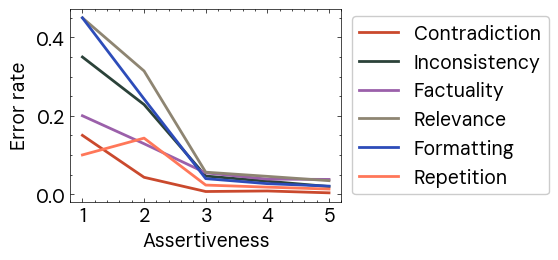

In [20]:
# Error rates grouped by perceived assertiveness (excluding refusals)

df_combined_filtered['assertive_bin'] = (df_combined_filtered['assertive']-0.5).round() + 1

fig = plt.figure(figsize=(3.5,2.5))
ax=plt.gca()

for error_factor in error_factors:
    if error_factor in ['refusal']:
        continue
    df_combined_filtered[df_combined_filtered.refusal < 0.5].groupby('assertive_bin').mean(numeric_only=True).reset_index().plot.line('assertive_bin',error_factor, ax=ax, label=rename_fields([error_factor])[0], linewidth=2)
    
plt.xticks([1,2,3,4,5])
plt.xlabel('Assertiveness')
plt.ylabel('Error rate')
# plt.title('Perceived error rates against assertiveness')
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.5), facecolor='white', framealpha=1, frameon=True)
plt.savefig('../plots/part2_assertivebins_norefusal.pdf')

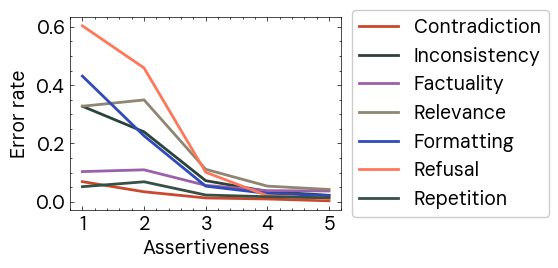

In [21]:
# Error rates grouped by perceived assertiveness

df_combined_filtered['assertive_bin'] = (df_combined_filtered['assertive']-0.5).round() + 1

fig = plt.figure(figsize=(3.5,2.5))
ax=plt.gca()

for error_factor in error_factors:
    df_combined_filtered.groupby('assertive_bin').mean(numeric_only=True).reset_index().plot.line('assertive_bin',error_factor, ax=ax, label=rename_fields([error_factor])[0], linewidth=2)
    
plt.xlabel('Assertiveness')
plt.ylabel('Error rate')
# plt.title('Perceived error rates against assertiveness')
plt.xticks([1,2,3,4,5])
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.5), facecolor='white', framealpha=1, frameon=True)
# plt.legend(loc='lower left', bbox_to_anchor=(0.6, 0.25), facecolor='white', framealpha=1, frameon=True)
plt.savefig('../plots/part2_assertivebins.pdf')

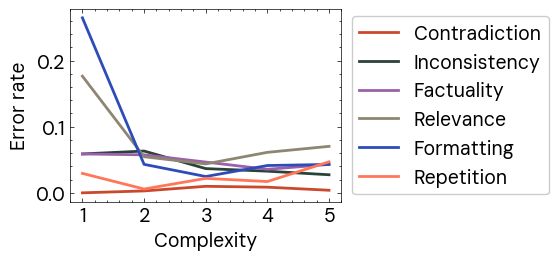

In [22]:
# Error rates grouped by perceived complexity (excluding refusals)

df_combined_filtered['complexity_bin'] = (df_combined_filtered['complexity']-0.5).round() + 1

fig = plt.figure(figsize=(3.5,2.5))
ax=plt.gca()

for error_factor in error_factors:
    if error_factor in ['refusal']:
        continue
    df_combined_filtered[df_combined_filtered.refusal < 0.5].groupby('complexity_bin').mean(numeric_only=True).reset_index().plot.line('complexity_bin',error_factor, ax=ax, label=rename_fields([error_factor])[0], linewidth=2)
    
plt.xlabel('Complexity')
plt.ylabel('Error rate')

# plt.title('Perceived error rates against complexity')
plt.xticks([1,2,3,4,5])
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.5), facecolor='white', framealpha=1, frameon=True)
# plt.legend(loc='lower left', bbox_to_anchor=(0.6, 0.25), facecolor='white', framealpha=1, frameon=True)
plt.savefig('../plots/part2_complexitybins_norefusal.pdf')

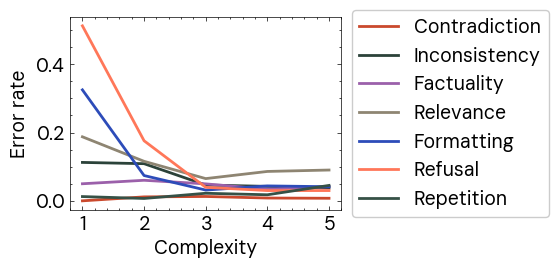

In [23]:
# Error rates grouped by perceived complexity

df_combined_filtered['complexity_bin'] = (df_combined_filtered['complexity']-0.5).round() + 1

fig = plt.figure(figsize=(3.5,2.5))
ax=plt.gca()

for error_factor in error_factors:
    df_combined_filtered.groupby('complexity_bin').mean(numeric_only=True).reset_index().plot.line('complexity_bin',error_factor, ax=ax, label=rename_fields([error_factor])[0], linewidth=2)
    
plt.xlabel('Complexity')
plt.ylabel('Error rate')

# plt.title('Perceived error rates against complexity')
plt.xticks([1,2,3,4,5])
plt.legend(loc='center right', bbox_to_anchor=(1.8, 0.5), facecolor='white', framealpha=1, frameon=True)
# plt.legend(loc='lower left', bbox_to_anchor=(0.6, 0.25), facecolor='white', framealpha=1, frameon=True)
plt.savefig('../plots/part2_complexitybins.pdf')

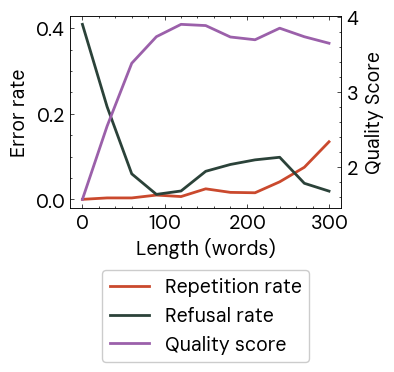

In [24]:
# Error rates grouped by response length

df_combined_filtered['length_bin'] = (df_combined_filtered['length'].clip(upper=300) / 3).round(-1) * 3

fig = plt.figure(figsize=(3.5,2.5))
ax=plt.gca()

series = []
for error_factor in ['repetition','refusal']: #,'factuality'
    line = df_combined_filtered.groupby('length_bin').mean(numeric_only=True).reset_index().plot.line('length_bin',error_factor, ax=ax, label=rename_fields([error_factor])[0]+' rate', legend=None, linewidth=2)
    series.append(line)
    
ax2 = ax.twinx()
for error_factor in ['unbiased']: #,'factuality'
    line = df_combined_filtered.groupby('length_bin').mean(numeric_only=True).reset_index().plot.line('length_bin',error_factor, ax=ax2, label=rename_fields([error_factor])[0]+' score', color=coplot.COHERE_COLORS_ALL[2], legend=None, linewidth=2)
    series.append(line)


ax.set_xlabel('Length (words)')
ax.set_ylabel('Error rate')
ax2.set_ylabel('Quality Score')
# ax.set_title('Response quality against length')

series = ax.lines + ax2.lines

plt.legend(series, [l.get_label() for l in series], loc='lower center', bbox_to_anchor=(0.5, -0.85), facecolor='white', framealpha=1, frameon=True)
# plt.legend(series, [l.get_label() for l in series], loc='center right', bbox_to_anchor=(1.8, 0.5), facecolor='white', framealpha=1, frameon=True)

plt.savefig('../plots/part2_lengthbins.pdf')

<Axes: ylabel='Frequency'>

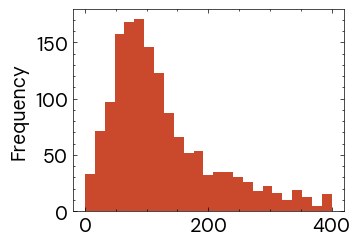

In [25]:
# Distribution of response lengths
df_combined_filtered.length.clip(upper=400).plot.hist(bins=25)

In [27]:
# Fit a linear regression model between assertiveness and (unbiased) quality scores

# import statsmodels.api as sm

# data = df_combined_filtered.reset_index()

# for model in ['llama13chat', 'command_52Bpref_v14.7_20230817']:
#     print(model)
#     x = data[data.model == model].assertive
#     y = data[data.model == model].unbiased
    
#     X = sm.add_constant(x)
#     model = sm.OLS(y, X)
#     results = model.fit()
#     print(results.summary())

llama13chat 	 0.6312814056778401
command_52Bpref_v14.7_20230817 	 0.7072339070127031


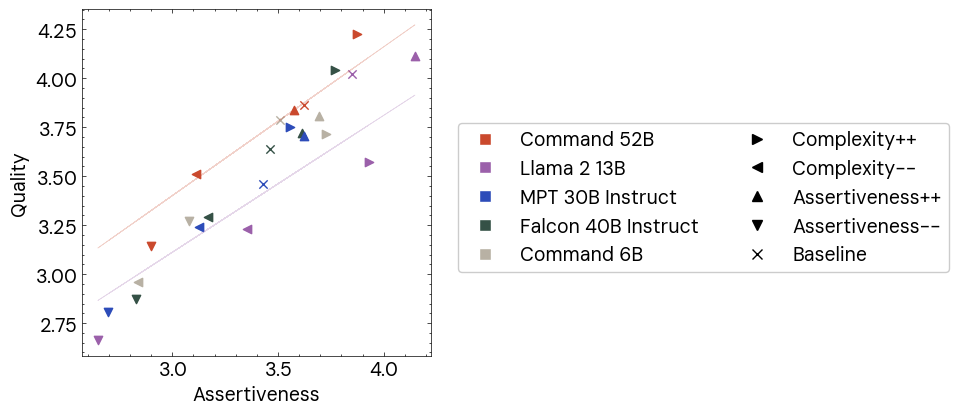

In [28]:
# Plot assertiveness vs quality

data = df_combined_filtered.reset_index()[df_combined_filtered.reset_index().preamble_type != 'blank'].groupby(['model','preamble_type'])[group_factors+['unbiased']+['overall']].mean()

models_to_show = ['command_52Bpref_v14.7_20230817',
 'llama13chat',
                  'mpt30instruct','falcon40',
                 'command_6Bpref_v14.7_20230817']

all_preamble_types = ['complexity_high', 'complexity_low', 'confidence_high',
       'confidence_low', 'normal']

markers = [">","<","^","v","x"]

plt.figure(figsize=(4.5,4.5))



for model in ['llama13chat', 'command_52Bpref_v14.7_20230817']:
# for model in ['llama13chat', 'falcon40','command_52Bpref_v14.7_20230817']:
# for model in models_to_show:
    trend_data = df_combined_filtered[df_combined_filtered.refusal < 1.5].reset_index()
    x_trend = trend_data[trend_data.model == model].assertive
    y_trend = trend_data[trend_data.model == model].unbiased
    z = np.polyfit(x_trend, y_trend, 1)
    y_hat = np.poly1d(z)(data.assertive)
    plt.plot(data.assertive, y_hat, lw=0.5, c=coplot.COHERE_COLORS_ALL[2*models_to_show.index(model)], alpha=0.25)
#     plt.text(data.assertive.max()+0.1,y_hat.max()+(0.0 if model == 'command_52Bpref_v14.7_20230817' else -0.08),r'$\alpha={:0.2f}$'.format(z[0]), c=coplot.COHERE_COLORS_ALL[2*models_to_show.index(model)])
    corr_r2 = np.corrcoef(x_trend, y_trend)[0,1]
    print(model, '\t', corr_r2)
#     plt.text(data.assertive.max()+0.1,y_hat.max()-0.05,r'$R^2={:0.2f}$'.format(corr_r2), c=coplot.COHERE_COLORS_ALL[2*models_to_show.index(model)])


for x,y,label, model, preamble_type in zip(data.assertive, data.unbiased, rename_fields(data.reset_index().model), data.reset_index().model, data.reset_index().preamble_type):
    if model in models_to_show:
        plt.scatter(x,y, label=rename_fields([model])[0]+", "+rename_fields([preamble_type])[0], color=coplot.COHERE_COLORS_ALL[2*models_to_show.index(model)], marker=markers[all_preamble_types.index(preamble_type)])

    
plt.xlabel('Assertiveness')
plt.ylabel('Quality')



from matplotlib.lines import Line2D
legend_elements = []
for i, model in enumerate(models_to_show):
    model_name = rename_fields([model])[0]
    legend_elements.append(Line2D([0], [0], marker='s', color='w', label=model_name,
                          markerfacecolor=coplot.COHERE_COLORS_ALL[2*i], markersize=8, linestyle=''))

for i, model in enumerate(all_preamble_types):
    model_name = rename_fields([model])[0]
    legend_elements.append(Line2D([0], [0], marker=markers[i], color='black', label=model_name,
                          markerfacecolor='black', markersize=7, linestyle=''))

# plt.legend(handles=legend_elements, ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.72), facecolor='white', framealpha=1, frameon=True, fontsize=12)
plt.legend(handles=legend_elements, ncol=2, bbox_to_anchor=(1.05, 0.7), facecolor='white', framealpha=1, frameon=True)
# plt.title('Perceived quality against assertiveness')
plt.savefig('../plots/all_models.pdf')


In [29]:
all_responses = df_groupings.groupby('preamble_type').response.unique()

In [30]:
# Get reading difficulty scores for all responses
from readability import Readability
from collections import defaultdict

from nltk.tokenize import word_tokenize

all_scores = defaultdict(list)

def flesch_kincaid(r):
    stats = r._statistics
    return (0.38 * stats.avg_words_per_sentence +
                11.8 * stats.avg_syllables_per_word) - 15.59

for preamble_type, group in all_responses.items():
    if 'confidence' in preamble_type:
        continue
    scores = []
    for response in group:
        if len(word_tokenize(response)) < 2:
            continue
        
        r = Readability(response)
        
#         if len(word_tokenize(response)) < 10 or r.statistics()['num_words'] < 100:
#             score = 3
#         else:
#         score = r.flesch_kincaid().grade_level
        score = flesch_kincaid(r)
        all_scores[preamble_type].append(min(round(int(score)),24))

    



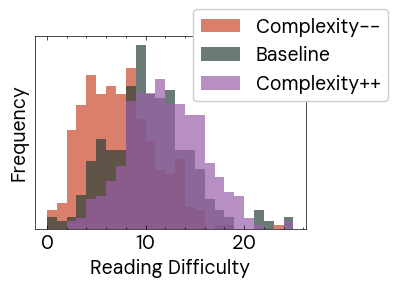

In [31]:
# Plot reading difficulty
complexity_types = ['complexity_low','normal','complexity_high']

plt.figure(figsize=(3.5,2.5))

for i, label in enumerate(complexity_types):
    scores = all_scores[label]
    plt.hist(scores, bins=25, range=(0,25),  alpha=0.7, rwidth=0.5, label=rename_fields([label])[0], color=coplot.COHERE_COLORS_GROUPED[i][0], density=True, histtype='stepfilled')
#     plt.hist(scores, bins=25, range=(0,25),  alpha=1, rwidth=0.5, label=label, color=coplot.COHERE_COLORS_GROUPED[i][0], density=True, histtype='step') #width=0.6,
plt.xlabel('Reading Difficulty')
plt.ylabel('Frequency')
plt.yticks([])
plt.legend(loc='center left', bbox_to_anchor=(0.55, 0.9), facecolor='white', framealpha=1, frameon=True)
plt.savefig('../plots/part2_readinggrade.pdf', bbox_inches='tight')
plt.show()

In [32]:
# Get sentiment scores for all responses

from collections import defaultdict

from nltk.tokenize import word_tokenize

all_scores_sentiment = defaultdict(list)

from transformers import pipeline
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)


def get_sentiment_score(text):
    res = sentiment_task(text, top_k=3, truncation=True, max_length=512)
    scores = {row['label']: row['score'] for row in res}
    return scores['positive'] - scores['negative']
    

for preamble_type, group in all_responses.items():
    if 'complexity' in preamble_type:
        continue
    scores = []
    for response in group:
        score = get_sentiment_score(response)
        all_scores_sentiment[preamble_type].append(score)

    
    


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


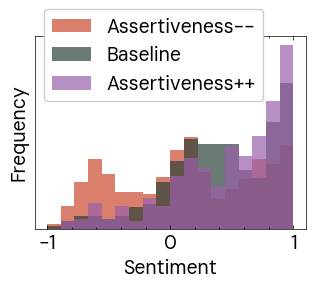

In [33]:
# Plot sentiment scores
assertiveness_types = ['confidence_low','normal','confidence_high']

plt.figure(figsize=(3.5,2.5))

for i, label in enumerate(assertiveness_types):
    scores = all_scores_sentiment[label]
    plt.hist(scores, bins=18, range=(-1,1),  alpha=0.7, rwidth=0.5, label=rename_fields([label])[0], color=coplot.COHERE_COLORS_GROUPED[i][0], density=True, histtype='stepfilled')
#     plt.hist(scores, bins=25, range=(0,25),  alpha=1, rwidth=0.5, label=label, color=coplot.COHERE_COLORS_GROUPED[i][0], density=True, histtype='step') #width=0.6,
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.yticks([])
plt.legend(loc='center left', bbox_to_anchor=(0, 0.9), facecolor='white', framealpha=1, frameon=True)
plt.savefig('../plots/part2_sentiment.pdf', bbox_inches='tight')
plt.show()

In [34]:
# Construct a DataFrame from the verification examples

import pandas as pd


with jsonlines.open('../results/batch_controlled/prolific_results/annotated_instances_confound_validation_1.jsonl') as reader:
    verification_results = list(reader)
    
with jsonlines.open('../results/batch_controlled/prolific_results/annotated_instances_confound_validation_2.jsonl') as reader:
    verification_results += list(reader)


error_factors = ['contradiction','inconsistent','factuality','relevance','formatting',  'refusal','repetition']

all_datasets = ['wikihow','amazon','curation']
all_models = ['command_52Bpref_v14.7_20230817','command_6Bpref_v14.7_20230817','falcon40','mpt30instruct','llama13chat']


df_rows = []
for row in verification_results:
    ab = 'a'  # these ratings were collected singly
    df_row = [
        row['input_meta']['dataset'],
        str(row['input_meta']['sample_ix']),
        row['input_meta'][f'model_{ab}'],
        row['input_meta'][f'preamble_type_{ab}'],
        row['input_text']['Prompt'],
        row['input_text'][f'Response {ab.upper()}'],
#         row['label_annotations']['feedback'],
        row['behavioral_data']['time_string'],
        # Actual annotations below
    ]

    for factor in error_factors:
        df_row.append(float(1.0 if row['label_annotations'][f'{factor}_{ab}'] == "Yes" else 0.0))

    df_rows.append(df_row)

df_verification = pd.DataFrame(
    df_rows,
    columns=['dataset','sample_ix','model','preamble_type','prompt','response','time_str',] + error_factors,
    
)



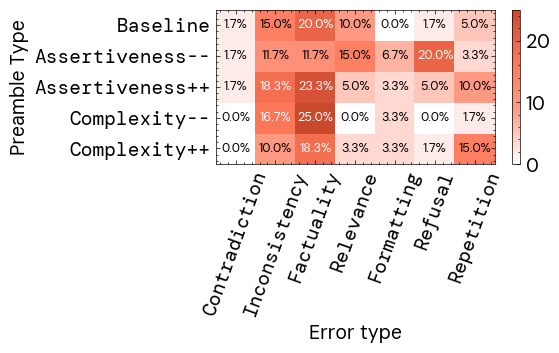

In [35]:
# Error rates for expert annotations

data = df_verification.groupby('preamble_type').mean(numeric_only=True) * 100

plt.figure(figsize=(4.5,2))
plt.pcolor(data, cmap=coplot.COHERE_CMAP_POS, vmin=0, vmax=25)
plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields(data.index), font='DM Mono')
plt.xticks(np.arange(0.5, len(data.columns), 1), rename_fields(data.columns), font='DM Mono', rotation=70)
plt.colorbar()

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '{:0.1f}%'.format(data.iloc[y, x]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 font='DM Sans',
                 fontsize=9,
                 color='white' if data.iloc[y, x] > 15 else 'black',
                 )
plt.xlabel('Error type')
plt.ylabel('Preamble Type')
plt.savefig('../plots/part2_errors_by_preamble_gold.pdf', bbox_inches='tight')
plt.show()




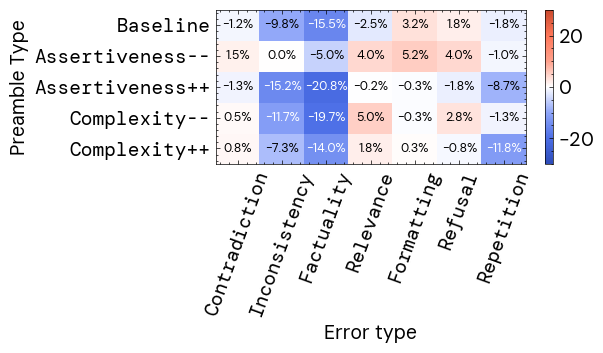

In [36]:
# Diff between annotators and experts

data = df_errors[df_errors.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix'])[error_factors].agg(lambda x: np.mean(pd.Series.mode(x))).groupby('preamble_type').mean(numeric_only=True) - df_verification.groupby('preamble_type').mean(numeric_only=True)
data *= 100

plt.figure(figsize=(5,2))
plt.pcolor(data, cmap=coplot.COHERE_CMAP_POSNEG, vmin=-30, vmax=30)
plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields(data.index), font='DM Mono')
plt.xticks(np.arange(0.5, len(data.columns), 1), rename_fields(data.columns), font='DM Mono', rotation=70)
plt.colorbar()

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '{:0.1f}%'.format(data.iloc[y, x]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 font='DM Sans',
                 fontsize=9,
                 color='white' if np.abs(data.iloc[y, x]) > 10 else 'black',
                 )
plt.xlabel('Error type')
plt.ylabel('Preamble Type')
plt.savefig('../plots/part2_errors_by_preamble_diff.pdf', bbox_inches='tight')
plt.show()


In [37]:
# Error rates table

EXCLUDE_REFUSAL = True

data = df_errors[df_errors.sample_ix.str.startswith('distractor_') != True].groupby(['dataset','model','preamble_type','sample_ix'])[error_factors].agg(lambda x: np.mean(pd.Series.mode(x)))
data = data[data.refusal < (0.5 if EXCLUDE_REFUSAL else 100)].groupby('preamble_type').mean(numeric_only=True) * 100

data['source'] = 'annotator'

data_gold = df_verification[df_verification.refusal != (1 if EXCLUDE_REFUSAL else 'blah')].groupby('preamble_type').mean(numeric_only=True) * 100
data_gold['source'] = 'gold'

data_diff = data[error_factors] - data_gold[error_factors]
data_diff['source'] = 'diff'

data_merged = pd.concat([data.reset_index(),data_gold.reset_index(), data_diff.reset_index()]).round(2)



data_merged_pivot = data_merged.groupby(['preamble_type','source']).mean().reset_index().pivot(index='preamble_type',columns='source')

cols_to_show = [[factor,src] for factor in error_factors if factor not in ['refusal'] for src in ['annotator','gold','diff']]

src_to_label = {
    'annotator': 'Ann.',
    'gold': 'Gold',
    'diff': '$\delta$'
}

def rename_fields_latex(f):
    if f in ['annotator','gold','diff']:
#         return f.capitalize()
        return src_to_label[f]
    if f in all_preamble_types:
        return '\\textit{' + rename_fields([f])[0].replace('--','-{}-') +"}"
    else:
        return rename_fields([f])[0].replace('--','-{}-')

print(data_merged_pivot[cols_to_show][::-1].rename(mapper=rename_fields_latex).rename(mapper=rename_fields_latex, axis=1).style.format(precision=1).to_latex())



\begin{tabular}{lrrrrrrrrrrrrrrrrrr}
 & \multicolumn{3}{r}{Contradiction} & \multicolumn{3}{r}{Inconsistency} & \multicolumn{3}{r}{Factuality} & \multicolumn{3}{r}{Relevance} & \multicolumn{3}{r}{Formatting} & \multicolumn{3}{r}{Repetition} \\
source & Ann. & Gold & $\delta$ & Ann. & Gold & $\delta$ & Ann. & Gold & $\delta$ & Ann. & Gold & $\delta$ & Ann. & Gold & $\delta$ & Ann. & Gold & $\delta$ \\
preamble_type &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\textit{Baseline} & 0.0 & 1.7 & -1.7 & 4.7 & 15.2 & -10.6 & 4.2 & 20.3 & -16.2 & 5.0 & 10.2 & -5.1 & 3.1 & 0.0 & 3.1 & 3.3 & 5.1 & -1.8 \\
\textit{Assertiveness-{}-} & 2.8 & 2.1 & 0.7 & 6.7 & 14.6 & -7.9 & 7.2 & 12.5 & -5.3 & 11.1 & 14.6 & -3.5 & 7.9 & 4.2 & 3.7 & 2.5 & 4.2 & -1.6 \\
\textit{Assertiveness++} & 0.3 & 1.8 & -1.4 & 2.4 & 19.3 & -16.9 & 2.2 & 24.6 & -22.3 & 3.6 & 5.3 & -1.6 & 2.1 & 0.0 & 2.1 & 1.2 & 10.5 & -9.3 \\
\textit{Complexity-{}-} & 0.5 & 0.0 & 0.5 & 3.8 & 16.7 & -12.9 & 5.2 & 25.0 & -19.8 & 3.5 & 0.

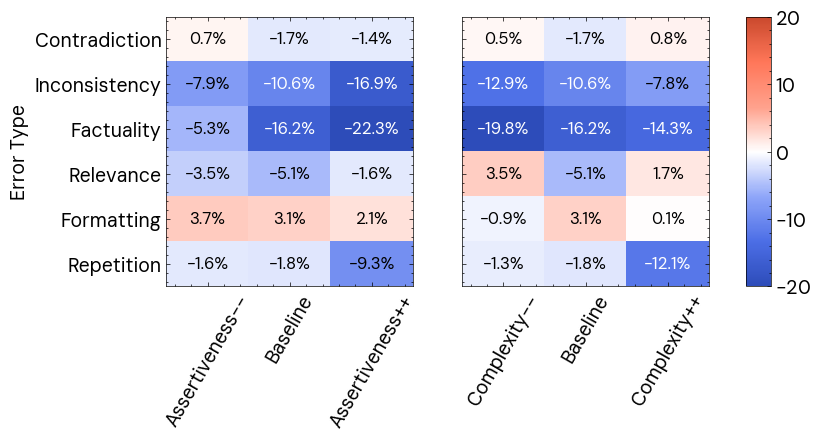

In [38]:
# Main plot for error rate differences

cols_to_show = [[factor,'diff'] for factor in error_factors if factor not in ['refusal'] or not EXCLUDE_REFUSAL]

# plt.figure(figsize=(5,5.5))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5), sharey=True, sharex=False)

for pltid, subgroup in enumerate([['confidence_low','normal','confidence_high'],['complexity_low','normal','complexity_high']]):

    data = data_merged_pivot[cols_to_show].groupby('preamble_type').mean().loc[subgroup].T

#     if pltid > 0:
#         ax = plt.subplot(1,2,pltid+1, sharey=ax)
#     else:
#     ax = plt.subplot(1,2,pltid+1)
    ax = axes[pltid]
        

    img = ax.imshow(data, cmap=coplot.COHERE_CMAP_POSNEG, vmin=-20, vmax=20, aspect='auto')
    if pltid == 0:
        ax.set_yticks(np.arange(0., len(data.index), 1), rename_fields([ix[0] for ix in data.index]))
        ax.set_ylabel('Error Type')
#         ax.set_xlabel('Error type')
#     else:
#         ax.set_yticklabels([])
#         ax.set_ylabel('')
    ax.set_xticks(np.arange(0., len(data.columns), 1), rename_fields([col for col in data.columns]), rotation=60)


    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            ax.text(x + 0., y + 0., '{:0.1f}%'.format(data.iloc[y, x]),
                     horizontalalignment='center',
                     verticalalignment='center',
                     font='DM Sans',
                     fontsize=12,
                     color='white' if np.abs(data.iloc[y, x]) > 10 else 'black',
                     )
            
cax = axes[1].inset_axes([1.15, 0., 0.1, 1.0])
plt.colorbar(img, ax=axes[1], cax=cax, shrink=1, pad=0.1)

# plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields([ix[0] for ix in data.index]), font='DM Mono')
# plt.ylabel('Preamble Type')
# plt.setxlabel('Preamble Type')
# fig.suptitle('Difference between annotator and expert error rates') #, font='DM Sans', fontsize=12
plt.savefig('../plots/part2_errors_by_preamble_diff{:}.pdf'.format("_norefusal" if EXCLUDE_REFUSAL else ''), bbox_inches='tight')
plt.show()


In [39]:
# Expert error rates by model

df_verification.groupby('model').mean(numeric_only=True)

,contradiction,inconsistent,factuality,relevance,formatting,refusal,repetition
model,,,,,,,
command_52Bpref_v14.7_20230817,0.00,0.183333,0.266667,0.033333,0.000000,0.016667,0.016667
command_6Bpref_v14.7_20230817,0.05,0.200000,0.266667,0.083333,0.016667,0.083333,0.116667
falcon40,0.00,0.133333,0.150000,0.116667,0.100000,0.116667,0.100000
llama13chat,0.00,0.100000,0.166667,0.083333,0.016667,0.033333,0.100000
mpt30instruct,0.00,0.100000,0.133333,0.016667,0.033333,0.033333,0.016667


In [135]:
# Group by expert factuality ratings


df_verification_grouped = df_verification.groupby(['dataset','model','preamble_type','sample_ix']).mean()


# df_combined_filtered

df_verification_merged = df_verification_grouped.join(df_combined_filtered, how='inner', lsuffix='_expert',rsuffix='_crowd')

data = df_verification_merged.groupby(['factuality_expert', 'preamble_type']).mean()[['factuality_crowd']]
# ['confidence_low','normal','confidence_high']

data = data.reset_index().pivot(index='preamble_type',columns='factuality_expert') * 100

data.to_markdown()



/tmp/ipykernel_6638/2837051233.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_verification_grouped = df_verification.groupby(['dataset','model','preamble_type','sample_ix']).mean()


"| preamble_type   |   ('factuality_crowd', 0.0) |   ('factuality_crowd', 1.0) |\n|:----------------|----------------------------:|----------------------------:|\n| complexity_high |                     3.06122 |                     0       |\n| complexity_low  |                     3.33333 |                    13.3333  |\n| confidence_high |                     2.17391 |                     3.57143 |\n| confidence_low  |                     1.88679 |                     0       |\n| normal          |                     1.04167 |                    16.6667  |"

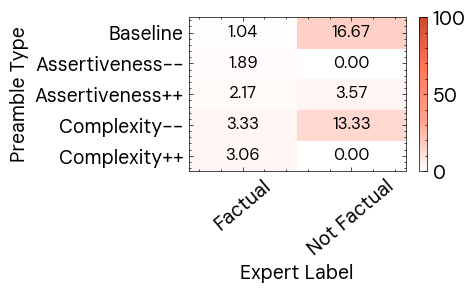

In [123]:
plt.figure(figsize=(3.5,2))
plt.pcolor(data, cmap=coplot.COHERE_CMAP_POS, vmin=0, vmax=100)
plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields(data.index))
plt.xticks(np.arange(0.5, len(data.columns), 1), ['Factual','Not Factual'], rotation=40)
plt.colorbar()

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.2f' % (data.iloc[y, x]),
                 horizontalalignment='center',
                 verticalalignment='center',
#                  font='DM Sans',
                 fontsize=12,
                 color='white' if (data.iloc[y, x] > 50) else 'black',
                 )
plt.xlabel('Expert Label')
plt.ylabel('Preamble Type')
plt.savefig('../plots/part2_controlled_for_true_factuality.pdf')
plt.show()

In [132]:

df_verification.groupby(['factuality', 'preamble_type']).count()['dataset'].reset_index().pivot(index='preamble_type',columns='factuality')

dataset    
factuality          0.0 1.0
preamble_type              
complexity_high      49  11
complexity_low       45  15
confidence_high      46  14
confidence_low       53   7
normal               48  12

In [138]:
#  Calculate precision/recall of crowdworkers wrt factuality

from sklearn.metrics import precision_score, recall_score

precision_score(df_verification_merged.factuality_expert, df_verification_merged.factuality_crowd.round()), recall_score(df_verification_merged.factuality_expert, df_verification_merged.factuality_crowd.round())

(0.3333333333333333, 0.01694915254237288)

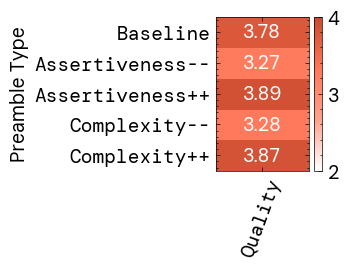

In [40]:
# Quality scores by preamble type

data = df_combined_filtered[df_combined_filtered.refusal != 1].groupby('preamble_type')[['unbiased']].mean(numeric_only=True)




plt.figure(figsize=(1.5,2))
plt.pcolor(data, cmap=coplot.COHERE_CMAP_POS, vmin=2, vmax=4)
plt.yticks(np.arange(0.5, len(data.index), 1), rename_fields(data.index), font='DM Mono')
plt.xticks(np.arange(0.5, len(data.columns), 1), rename_fields(data.columns), font='DM Mono', rotation=70)
plt.colorbar()

for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        plt.text(x + 0.5, y + 0.5, '{:0.2f}'.format(data.iloc[y, x]),
                 horizontalalignment='center',
                 verticalalignment='center',
                 font='DM Sans',
#                  fontsize=9,
                 color='white' if data.iloc[y, x] > 2 else 'black',
                 )
# plt.xlabel('Error type')
plt.ylabel('Preamble Type')
plt.savefig('../plots/part2_quality_by_preamble.pdf', bbox_inches='tight')
plt.show()




In [41]:
# Correlation coeffs for ratings

df_combined_filtered[['assertive','complexity','unbiased']].corr(method='pearson')

,assertive,complexity,unbiased
assertive,1.000000,0.529319,0.683086
complexity,0.529319,1.000000,0.412983
unbiased,0.683086,0.412983,1.000000


In [42]:
# Helper to convert all plots to png for slides/web

import glob
from pdf2image import convert_from_path

poppler_path = r"/usr/bin"

pdf_filenames = glob.glob('../plots/*.pdf')

for pdf_filename in pdf_filenames:
    images = convert_from_path(pdf_filename, poppler_path=poppler_path, transparent=True, dpi=320)
    tgt_filename = pdf_filename.replace('/plots/','/plots_png/').replace('.pdf','.png')

    images[0].save(f"{tgt_filename}", 'PNG')

ModuleNotFoundError: No module named 'pdf2image'

In [ ]:
# How many distinct outputs were annotated?
len(df_groupings_filtered)

In [ ]:
# How many distinct annotations?
len(df_errors)

In [ ]:
# Load up outputs to pick examples for paper

import jsonlines

with jsonlines.open('../results/batch_controlled/output_augmented_v2_llama13chat.jsonl') as reader:
    llama_responses = list(reader)
    
with jsonlines.open('../results/batch_controlled/output_augmented_v2_command52Bpref.jsonl') as reader:
    command52_responses = list(reader)

In [ ]:
responses_by_id_by_type = defaultdict(lambda: defaultdict(list))

for row in llama_responses:
    if row['dataset'] == 'wikihow':
        print(row['sample_ix'], row['original_prompt'])
        responses_by_id_by_type[row['sample_ix']][row['preamble_type']].append(row['response'].replace('\n',' '))
        
responses_by_id_by_type_command = defaultdict(lambda: defaultdict(list))

for row in command52_responses:
    if row['dataset'] == 'wikihow':
#         print(row['sample_ix'], row['original_prompt'])
        responses_by_id_by_type_command[row['sample_ix']][row['preamble_type']].append(row['response'].replace('\n',' '))

In [ ]:
responses_by_id_by_type[125]

In [ ]:
responses_by_id_by_type_command[125]

In [ ]:
# Generate table of full results by model for paper
    
data = df_combined_filtered

# data[error_factors] *=100

print(data[error_factors+['overall','unbiased']].groupby('model').mean().rename(mapper=rename_fields_latex, axis=0).rename(mapper=rename_fields_latex, axis=1).style.format(precision=2).to_latex())
# df_combined_filtered[error_factors+['unbiased']].groupby('model').mean()
